<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/EODAngelo/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimental Setup with Phyphox

*   This experiment uses a Samsung Galaxy Fold 5's internal accelerometer to measure the acceleration during a 5 foot freefall.
*   This accelerometer collects data at a rate of 481.9 Hz.



## Data Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data_URI = 'https://raw.githubusercontent.com/ubsuny/PHY386/refs/heads/Homework2025/2025/HW/EODAngelo/data/Freefall%201.csv'
data = pd.read_csv(data_URI,index_col=0)
data

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
Time (s),,,,
0.000000,0.620339,4.241278,8.443673,9.469365
0.000000,0.427119,4.294518,8.242078,9.303610
0.000000,0.304487,4.345366,8.165507,9.254752
0.000000,0.399003,4.294518,8.353942,9.401619
0.000000,0.689133,4.261019,8.931211,9.919562
...,...,...,...,...
6.975644,-0.823131,-1.038485,10.648061,10.730200
6.977719,-0.780060,-0.985843,10.202995,10.280150
6.979794,-0.722632,-0.914058,9.777073,9.846261


<Axes: xlabel='Time (s)'>

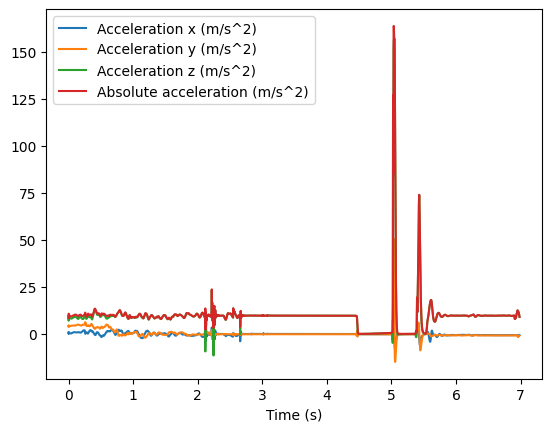

In [4]:
data.plot()

I have gone through several iterations and much troubleshooting and cannot figure out why the phone is reporting an acceleration in excess of 150 m/s^2. I will remove this aberrancy by only utilizing a section of data that makes sense.

In [39]:
trimmed_data = data['Absolute acceleration (m/s^2)'][(data['Absolute acceleration (m/s^2)'].index>5) & (data['Absolute acceleration (m/s^2)'].index<5.08)]

<Axes: xlabel='Time (s)'>

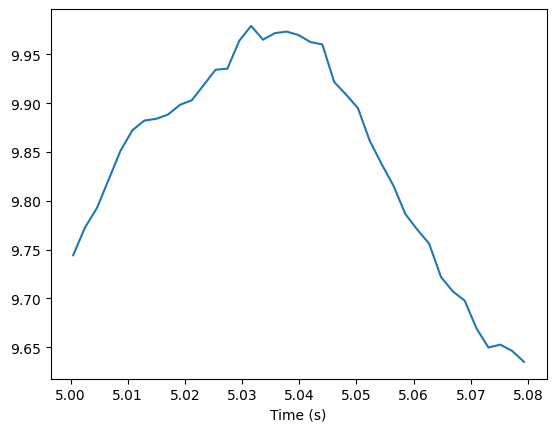

In [40]:
trimmed_data.plot()

## Model Fitting and Visualization

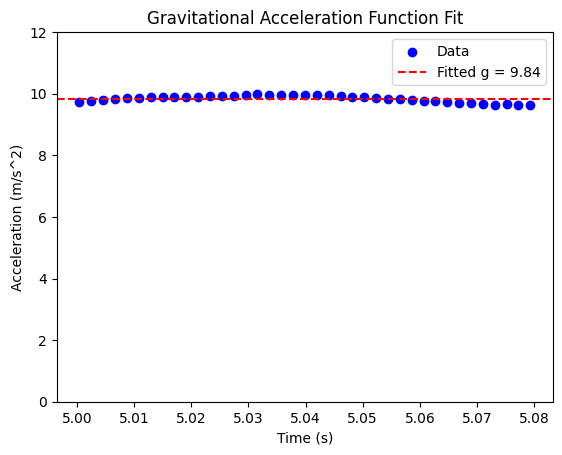

g = 9.840 +/- 0.017 m/s^2


In [42]:
def fit_gravaccel_func(x, g):
  """ fitting function for gravitational acceleration near Earth's surface """
  return g

params, covariance = curve_fit(fit_gravaccel_func, trimmed_data.index, trimmed_data)
fitted_g = params[0]


plt.scatter(trimmed_data.index, trimmed_data, label="Data", color="blue")
plt.axhline(fitted_g, color="red", linestyle="--", label= "Fitted g = {:.2f}".format(fitted_g))
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.ylim(0, 12)
plt.title("Gravitational Acceleration Function Fit")
plt.legend()
plt.show()


sdev = np.sqrt(np.diag(covariance))
print("g = {:.3f} +/- {:.3f} m/s^2".format(fitted_g, sdev[0]))

## Advanced Visualization

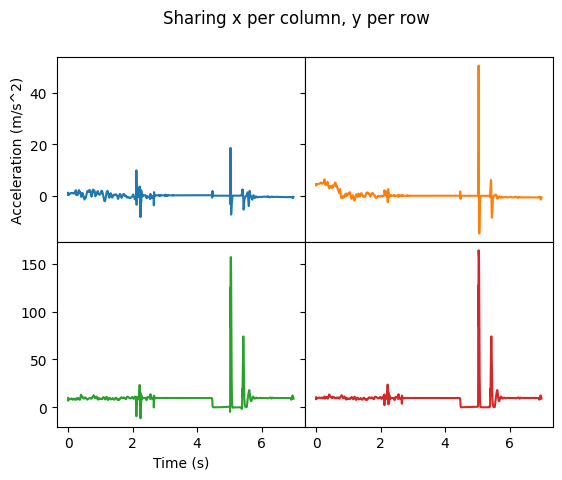

In [13]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(data.index, data['Acceleration x (m/s^2)'])
ax2.plot(data.index, data['Acceleration y (m/s^2)'], 'tab:orange')
ax3.plot(data.index, data['Acceleration z (m/s^2)'], 'tab:green')
ax4.plot(data.index, data['Absolute acceleration (m/s^2)'], 'tab:red')

ax1.set_ylabel('Acceleration (m/s^2)')
ax3.set_xlabel('Time (s)')



for ax in fig.get_axes():
    ax.label_outer()

## Error Propagation and Reporting

1. The systematic error as reported by the Phyphox app is 0.010 m/s^2.

2. Utilizing NOAA's geoid calculator, the local gravitation acceleration where the expermiment was performed is approximately 9.806 m/s^2. This value is not within the range of the experimental value but it is quite close for level of experiment.

3. Some possible sources of error that could explain this discrepancy include:
* Inaccurate accelerometer
* Insufficient length of freefall / more data required
* Inconsistent attitude of phone during fall
* The Galaxy Fold 5 is quite large, air reistnace could have slowed the acceleration.